In [19]:
import pickle
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d


In [2]:
df = pd.read_csv('features_data.csv')
df.head()

,euclidean_distance,manhattan_distance,cosine_similarity,label
0,0.006625,0.034209,1.000000,0
1,0.974471,5.002714,-0.999954,1
2,0.977481,5.018157,-0.999956,1
3,0.008371,0.043084,1.000000,0
4,0.982622,5.044469,-0.999954,1


In [3]:
df.describe()

,euclidean_distance,manhattan_distance,cosine_similarity,label
count,14690.000000,14690.000000,14690.000000,14690.000000
mean,0.423070,2.172201,0.366569,0.454867
std,0.458759,2.355429,0.928338,0.497976
min,0.000011,0.000052,-0.999959,0.000000
25%,0.006118,0.031433,-0.999780,0.000000
50%,0.018058,0.092655,1.000000,0.000000
75%,0.953448,4.895903,1.000000,1.000000
max,1.027673,5.276564,1.000000,1.000000


<AxesSubplot: >

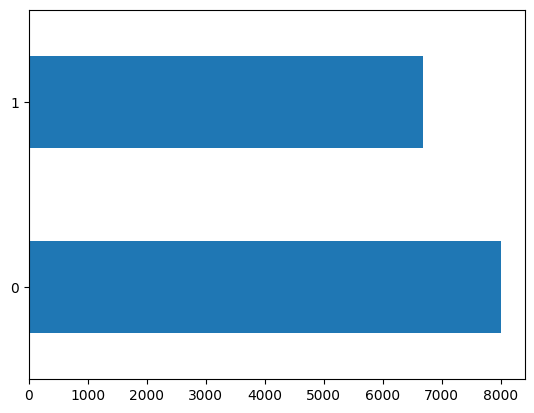

In [4]:
df['label'].value_counts().plot(kind='barh')

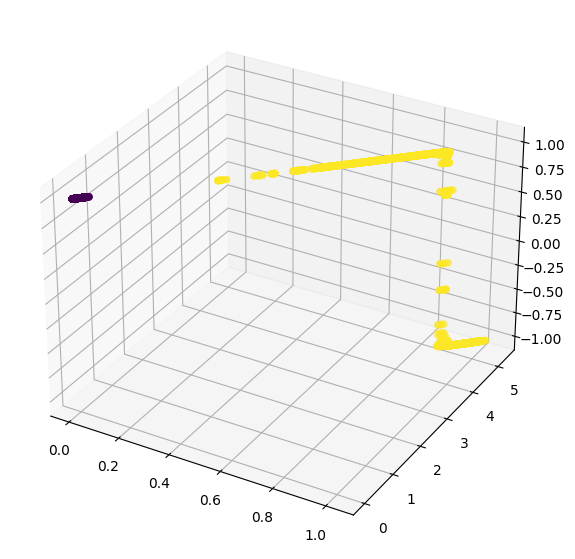

In [6]:
x = df['euclidean_distance'].values
y = df['manhattan_distance'].values
z = df['cosine_similarity'].values
c = df['label'].values


fig = plt.figure(figsize=(15, 7))
ax = plt.axes(projection ='3d')
ax.scatter3D(x, y,z, c=c)
plt.show()

In [8]:
X = df.drop(['label'], axis=1).values
Y = df['label'].values

In [14]:
print(X.shape)
print(y.shape)

(14690, 3)
(14690,)


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [13]:
print(X_train.shape)
print(y_train.shape)

(11752, 3)
(11752,)


In [15]:
print(X_test.shape)
print(y_test.shape)

(2938, 3)
(2938,)


In [16]:
svc = SVC(gamma='auto', kernel='linear')
svc.fit(X_train, y_train)

SVC(gamma='auto', kernel='linear')

In [22]:
y_pred = svc.predict(X_test)
accuracy_score(y_test, y_pred)

0.987


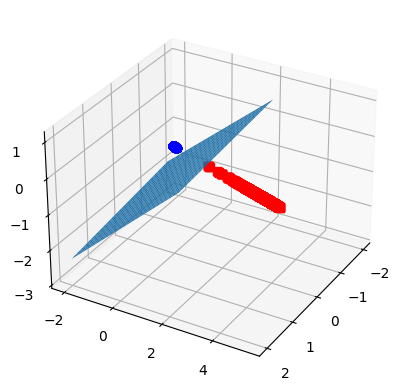

In [24]:
z = lambda x,y: (-svc.intercept_[0]-svc.coef_[0][0]*x-svc.coef_[0][1]*y) / svc.coef_[0][2]
tmp = np.linspace(-2,2,51)
x,y = np.meshgrid(tmp,tmp)

fig = plt.figure()
ax  = fig.add_subplot(111, projection='3d')
ax.plot3D(X[Y==0,0], X[Y==0,1], X[Y==0,2],'ob')
ax.plot3D(X[Y==1,0], X[Y==1,1], X[Y==1,2],'sr')
ax.plot_surface(x, y, z(x,y))
ax.view_init(30, 30)

plt.show()

In [21]:
filename = 'finalized_model.sav'
pickle.dump(svc, open(filename, 'wb'))